*Problem Statement*:

    Implementing Feedforward neural networks with Keras and TensorFlow for classification of  hand-written MNIST dataset using below steps: 
    a. Import the necessary packages
    b. Load the training and testing data 
    c. Define the network architecture using Keras 
    d. Train the model using SGD with 11 epochs
    e. Evaluate the network  
    f. Plot the training loss and accuracy


## a. Import the necessary packages


In [4]:
import matplotlib.pyplot as plt
import keras

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
pip install tensorflow

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python39\\Scripts\\pyrsa-decrypt.exe' -> 'c:\\Python39\\Scripts\\pyrsa-decrypt.exe.deleteme'

You should consider upgrading via the 'c:\Python39\python.exe -m pip install --upgrade pip' command.



  Using cached tensorflow-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached flatbuffers-22.10.26-py2.py3-none-any.whl (26 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached h5py-3.7.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-2.1.0-py3-none-any.whl (5.8 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached wrapt-1.14.1-cp39-cp39-win_amd64.whl (35 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached grpcio-1.50.0-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached tensorflow_io_gcs_filesystem-0.27.0-cp39-cp39-win_amd64.whl (1.

## b. Load the training and testing data 


In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


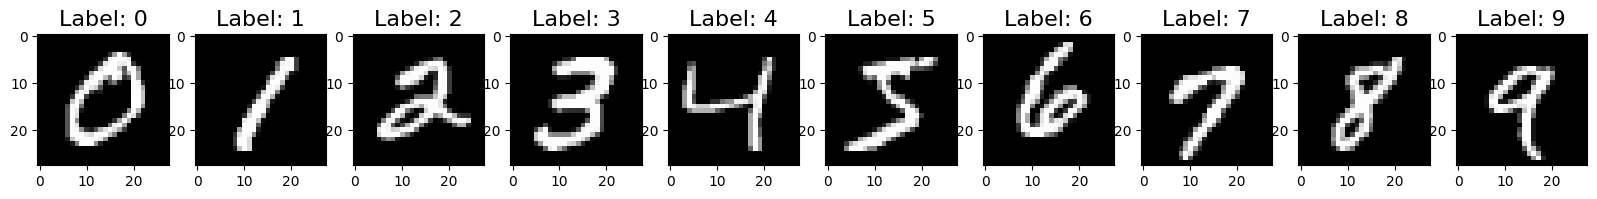

In [5]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [6]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [7]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [8]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [9]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


## c. Define the network architecture using Keras 


In [11]:
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

In [12]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

# Training the model using SGD
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


## d. Train the model using SGD with 11 epochs


In [13]:
batch_size = 512
epochs = 11 # As per the problem statement
# epochs = 100

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/11
118/118 [==============================] - 4s 13ms/step - loss: 0.9271 - accuracy: 0.7252
Epoch 2/11
118/118 [==============================] - 1s 13ms/step - loss: 0.4227 - accuracy: 0.8775
Epoch 3/11
118/118 [==============================] - 2s 13ms/step - loss: 0.3463 - accuracy: 0.8987
Epoch 4/11
118/118 [==============================] - 1s 12ms/step - loss: 0.3020 - accuracy: 0.9136
Epoch 5/11
118/118 [==============================] - 1s 13ms/step - loss: 0.2725 - accuracy: 0.9217
Epoch 6/11
118/118 [==============================] - 1s 13ms/step - loss: 0.2508 - accuracy: 0.9281
Epoch 7/11
118/118 [==============================] - 2s 15ms/step - loss: 0.2284 - accuracy: 0.9345
Epoch 8/11
118/118 [==============================] - 2s 14ms/step - loss: 0.2114 - accuracy: 0.9396
Epoch 9/11
118/118 [==============================] - 2s 14ms/step - loss: 0.1992 - accuracy: 0.9424
Epoch 10/11
118/118 [==============================] - 2s 13ms/step - loss: 0.1861 - accura

## e. Evaluate the network  

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.1480 - accuracy: 0.9537
Test Loss: 0.14797930419445038, Test Accuracy: 0.9537000060081482


In [15]:
# list all data in history
print(history.history.keys())


dict_keys(['loss', 'accuracy'])


## f. Plot the training loss and accuracy

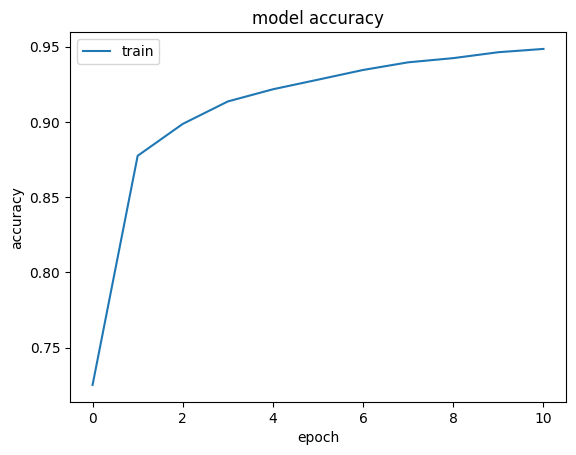

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


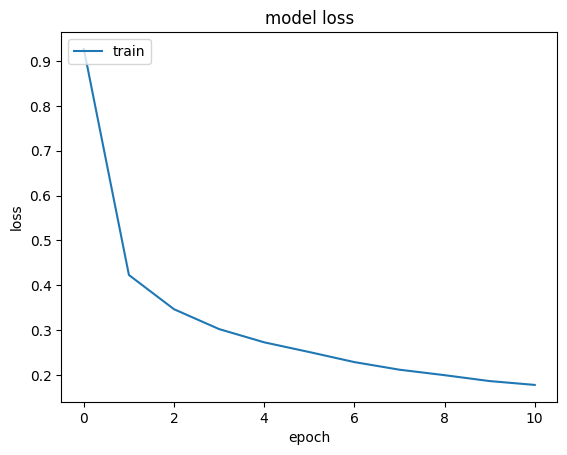

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()